In [1]:
import pandas as pd
df = pd.read_excel(r"C:\Users\Nolan\Desktop\DATA301\course-project-solo_311\data\raw\Meteorite_Landings.xlsx")

In [3]:
dfna = df[df.isna().any(axis=1)]

In [4]:
dfna

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
12,Aire-sur-la-Lys,425,Valid,Unknown,NaN,Fell,01/01/1769 12:00:00 AM,50.66667,2.33333,"(50.66667, 2.33333)"
37,Northwest Africa 5815,50693,Valid,L5,256.800,Found,NaN,0.00000,0.00000,"(0.0, 0.0)"
38,Angers,2301,Valid,L6,NaN,Fell,01/01/1822 12:00:00 AM,47.46667,-0.55000,"(47.46667, -0.55)"
76,Barcelona (stone),4944,Valid,OC,NaN,Fell,01/01/1704 12:00:00 AM,41.36667,2.16667,"(41.36667, 2.16667)"
93,Belville,5009,Valid,OC,NaN,Fell,1937-01-01 00:00:00,-32.33333,-64.86667,"(-32.33333, -64.86667)"
...,...,...,...,...,...,...,...,...,...,...
45589,Yamato 984028,40648,Valid,Martian (shergottite),12.342,Found,1998-01-01 00:00:00,NaN,NaN,NaN
45660,Yambo no. 2,30346,Valid,L3,3.200,Found,1975-01-01 00:00:00,NaN,NaN,NaN
45692,Zacatecas (1969),30382,Valid,"Iron, IIIAB",6660.000,Found,1969-01-01 00:00:00,NaN,NaN,NaN
45698,Zapata County,30393,Valid,Iron,NaN,Found,1930-01-01 00:00:00,27.00000,-99.00000,"(27.0, -99.0)"


In [5]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})

In [6]:
missing_value_df

,column_name,percent_missing
name,name,0.000000
id,id,0.000000
nametype,nametype,0.000000
recclass,recclass,0.000000
mass (g),mass (g),0.286552
fall,fall,0.000000
year,year,0.636539
reclat,reclat,16.000962
reclong,reclong,16.000962
GeoLocation,GeoLocation,16.000962


### It looks like most of the missing values are Location.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns


from scripts import project_functions
df = project_functions.load_and_process(r"C:\Users\Nolan\Desktop\DATA301\course-project-solo_311\data\raw\Meteorite_Landings.xlsx")


In [2]:
df.shape

(38101, 10)

In [3]:
df.head()

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,1880,50.77500,6.08333,"(50.775, 6.08333)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951,56.18333,10.23333,"(56.18333, 10.23333)"
2,Abee,6,Valid,EH4,107000.0,Fell,1952,54.21667,-113.00000,"(54.21667, -113.0)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976,16.88333,-99.90000,"(16.88333, -99.9)"
4,Achiras,370,Valid,L6,780.0,Fell,1902,-33.16667,-64.95000,"(-33.16667, -64.95)"


In [6]:
df.nunique()

name           38101
id             38101
nametype           2
recclass         422
mass (g)       11246
fall               2
year             239
reclat         12595
reclong        14464
GeoLocation    16894
dtype: int64

In [20]:
df.describe()

,id,mass (g),year,reclat,reclong
count,38101.000000,3.810100e+04,38101.000000,38101.000000,38101.000000
mean,25346.989922,1.402082e+04,1990.161413,-39.624798,61.325509
std,17397.000477,5.719597e+05,23.615956,46.159238,80.779440
min,1.000000,0.000000e+00,1688.000000,-87.366670,-165.433330
25%,10832.000000,6.630000e+00,1986.000000,-76.716670,0.000000
50%,21736.000000,2.900000e+01,1996.000000,-71.500000,35.666670
75%,39891.000000,1.868000e+02,2002.000000,0.000000,157.166670
max,57458.000000,6.000000e+07,2101.000000,81.166670,178.200000


In [21]:
df[df["year"]>2020]

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
24382,Northwest Africa 7701,57150,Valid,CK6,55.0,Found,2101,0.0,0.0,"(0.0, 0.0)"


Apparently I have one asteroid that fell in **2101**. This is obviously wrong. I will add a filter to my initial load script to scrap anything after 2020.
Something like: `df["year"] = df[df["year"]<2021]`

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns


from scripts import project_functions
df = project_functions.load_and_process(r"C:\Users\Nolan\Desktop\DATA301\course-project-solo_311\data\raw\Meteorite_Landings.xlsx")

In [2]:
df.describe()

,id,mass (g),year,reclat,reclong
count,38100.000000,3.810000e+04,38100.000000,38100.000000,38100.000000
mean,25346.155197,1.402119e+04,1990.158504,-39.625838,61.327119
std,17396.465773,5.719672e+05,23.609438,46.159398,80.779889
min,1.000000,0.000000e+00,1688.000000,-87.366670,-165.433330
25%,10831.750000,6.630000e+00,1986.000000,-76.716670,0.000000
50%,21735.500000,2.900000e+01,1996.000000,-71.500000,35.666670
75%,39890.250000,1.868500e+02,2002.000000,0.000000,157.166670
max,57458.000000,6.000000e+07,2013.000000,81.166670,178.200000


There we go, now the max year is 2013. 

I think the Geolocation column is redundant since it is useless in the brackets. Reclat and Reclong are easier to use.
I will also add this into my project_functions. `df.drop(columns=['GeoLocation'])`

None of these columns are directly related except for the latitude and longtitude so I shouldn't expect any correlation

<AxesSubplot:>

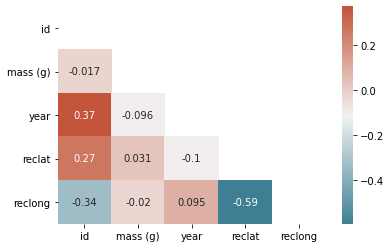

In [12]:
corr = df.corr()# plot the heatmap
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True), mask=mask)

Interestingly, Longitude is somewhat negatively correlated with latitude. Other things to note, year is correlated to id. This makes sense since the later the meteorite is discovered the higher the id. Mass is not correlated with anything, as expected.

I am curious if we can see evidence of the westward colonization of humans if more meteorites are discovered in the west in later years.

In [36]:
df2 = df[['year','reclong']].copy()

MemoryError: Unable to allocate array with shape (38100, 1) and data type int32

MemoryError: Unable to allocate array with shape (1, 38100) and data type float64